# 패키지

In [ ]:
# 수치해석, 백터화 연산, 수학 기본 모든 연산
import numpy as np

# 함수, 미적분, 통계적인 전반적으로 모든 연산을 도와주는 패키지
import scipy as sp

# 데이터 프레임 클래스 (R 데이터 프레임 자료형) 머신러닝 데이터 분석이 필수
import pandas as pd

# Matlab 그 장점을 파이썬에 사용할 수 있게 만들어주는 패키지
# matplotlib 사용예시 1,2
import matplotlib as mpl
import matplotlib.pyplot as plt

# matplotlib에서 지원하지 않는 고급 시각화 고급차트
import seaborn as sns

# 회귀분석, 선형회귀, 시계열분석 등등 분석 기능을 제공하는 패키지
import statsmodels.api as sm

# 머신러닝, 지도학습, 비지도학습, 데이터셋
import sklearn as sk

# 데이터 전처리, 누락된 데이터를 찾고 시각화를 할 수 있는 패키지
import missingno as msno

# patsy 데이터 프레임을 다루는 기능 제공하는 패키지
# statsmodel
import patsy

## 전처리 맛보기

In [ ]:
# 결측치가 포함된 csv 데이터 생성

%%writefile sample.csv
x1, x2, x3, x4, x5
,a,0.1,철수,2020-11-24
,b,0.2,영희,2020-11-25
3,c,0.3,,2020-11-26
4,d,0.4,은희,2020-11-27
5,e,,지우,2020-11-28
6,f,0.6,이슬,2020-11-29

Overwriting sample.csv


In [ ]:
import pandas as pd
pd.read_csv('sample.csv')

,x1,x2,x3,x4,x5
0,NaN,a,0.1,철수,2020-11-24
1,NaN,b,0.2,영희,2020-11-25
2,3.0,c,0.3,NaN,2020-11-26
3,4.0,d,0.4,은희,2020-11-27
4,5.0,e,NaN,지우,2020-11-28
5,6.0,f,0.6,이슬,2020-11-29


In [ ]:
df = pd.read_csv('sample.csv')

In [ ]:
df.isnull().sum()

x1     2
 x2    0
 x3    1
 x4    1
 x5    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4 non-null      float64
 1    x2     6 non-null      object 
 2    x3     5 non-null      float64
 3    x4     5 non-null      object 
 4    x5     6 non-null      object 
dtypes: float64(2), object(3)
memory usage: 368.0+ bytes


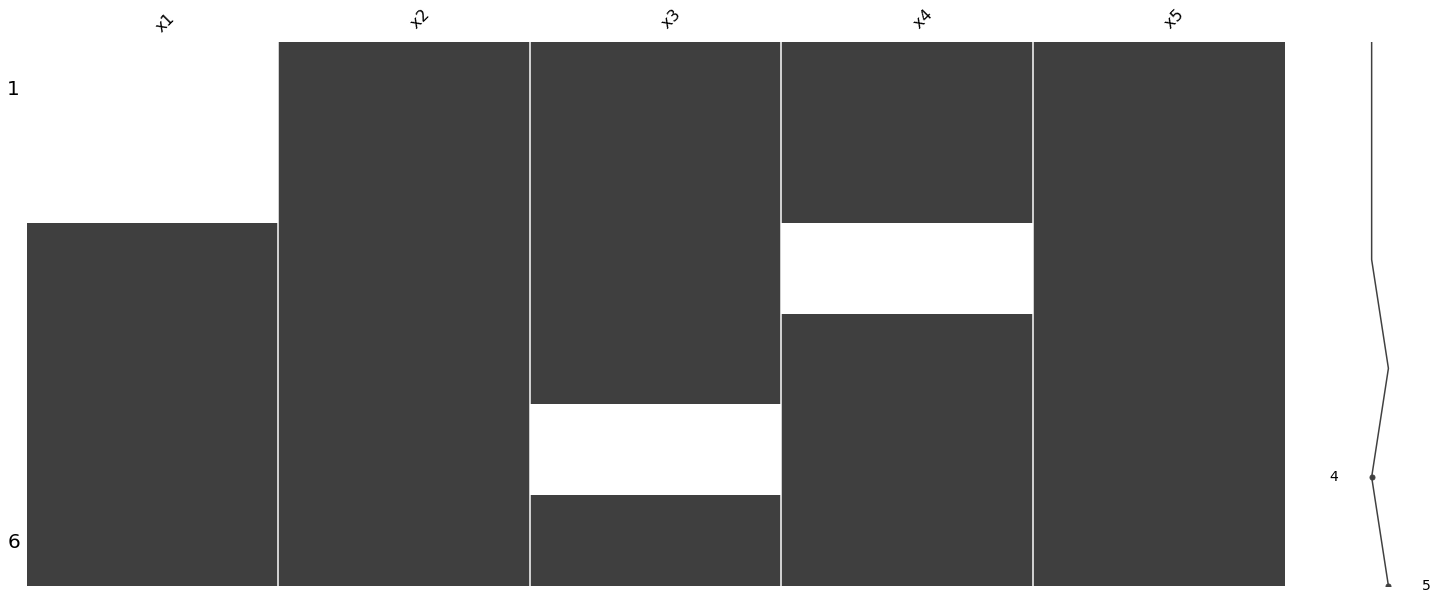

In [ ]:
# msno를 이용하여 결측치 matrix형태로 시각화
msno.matrix(df)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

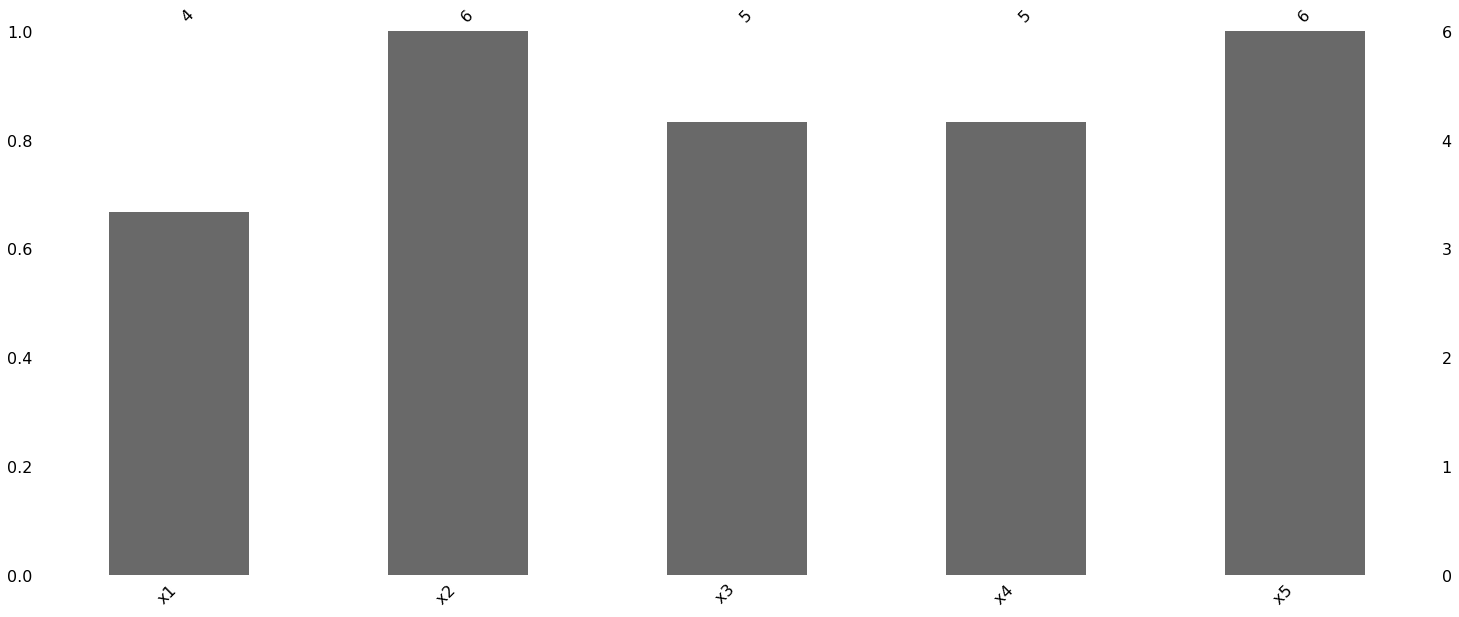

In [ ]:
# 결측치 bar형태로 시각화

msno.bar(df)
plt.show

In [ ]:
# titanic 데이터로 위 과정 반복

titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


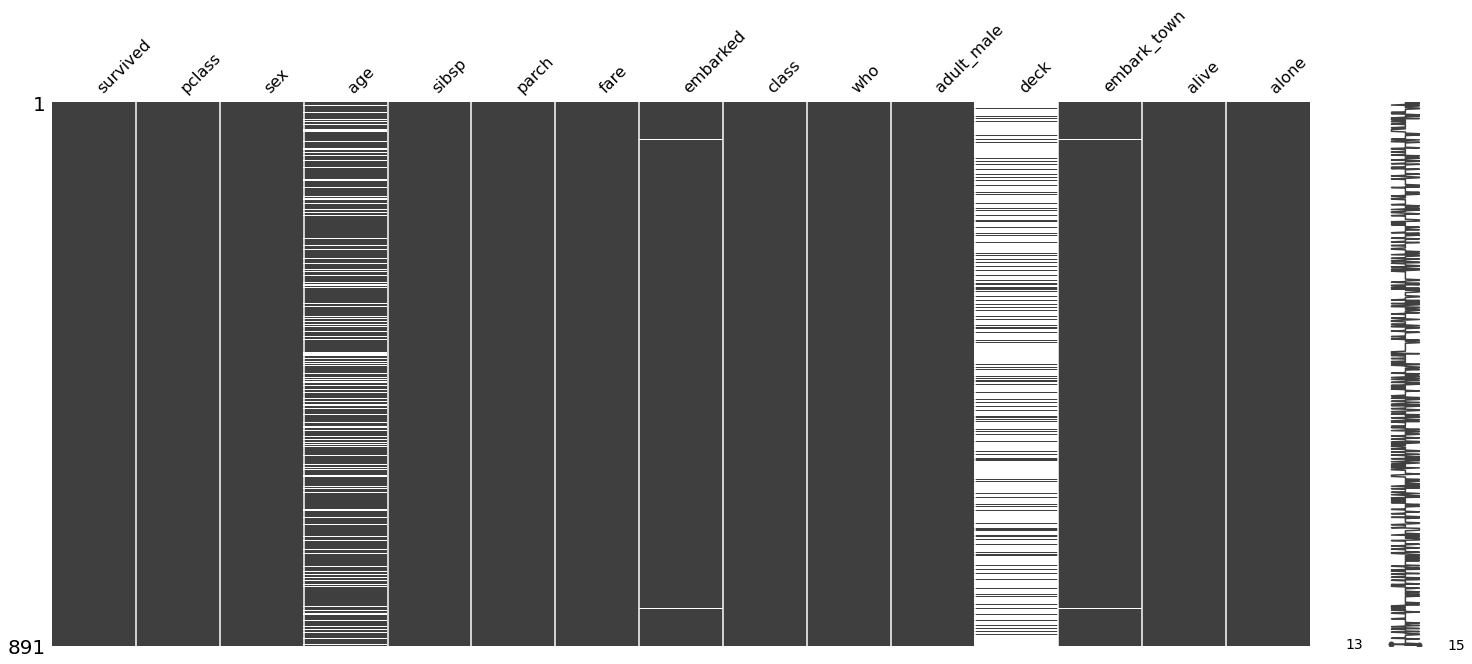

In [ ]:
msno.matrix(titanic)

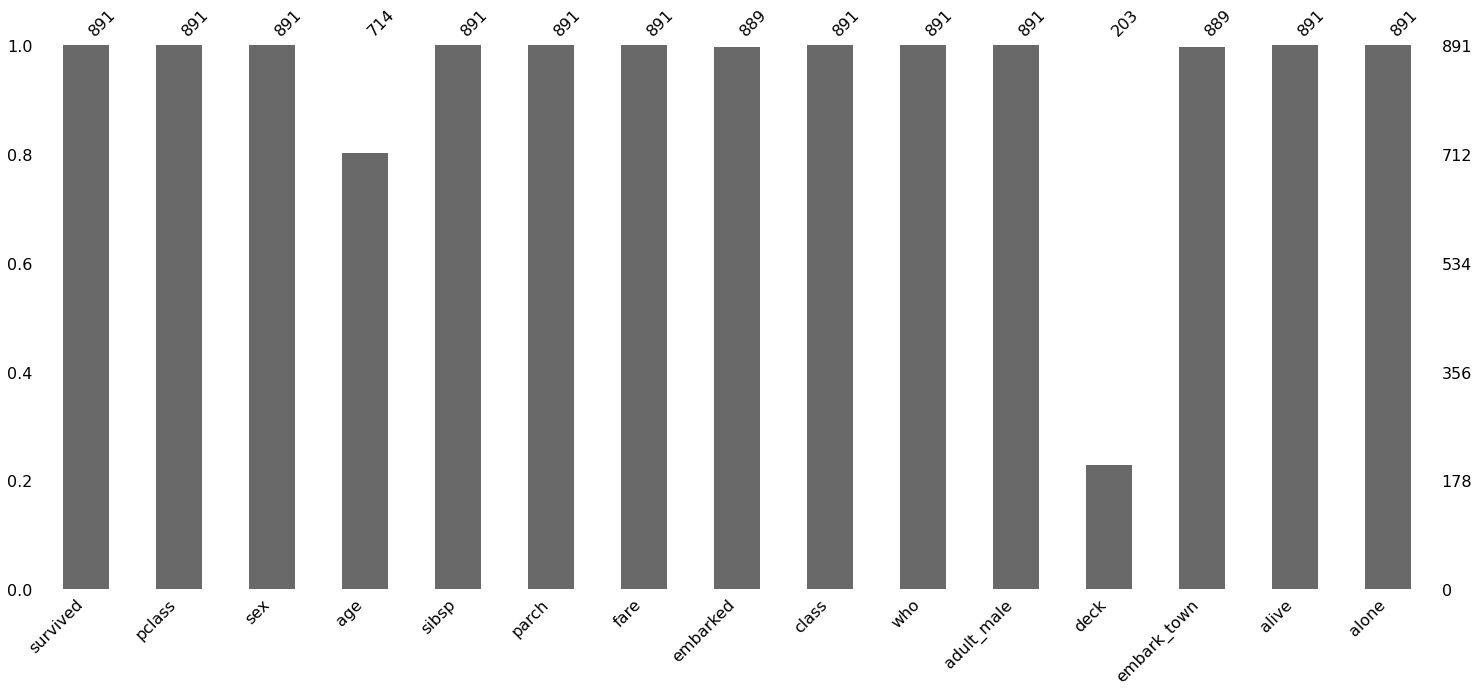

In [ ]:
msno.bar(titanic)

In [ ]:
titanic.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
titanic.dropna().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [ ]:
titanic.dropna(axis=1).head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [ ]:
titanic.dropna(thresh=205, axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# 드롭을 채우는 방법

from sklearn.impute import SimpleImputer
# mean 평균, median 중앙값, most_frequent 최빈값 세가지 params 중 
# 데이터의 특성에 가장 적합한 선택을 하기위해 데이터에 대한 이해와 지식이 요구된다.
Imputer = SimpleImputer(strategy='most_frequent')
titanic = pd.DataFrame(Imputer.fit_transform(titanic), columns=titanic.columns)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True


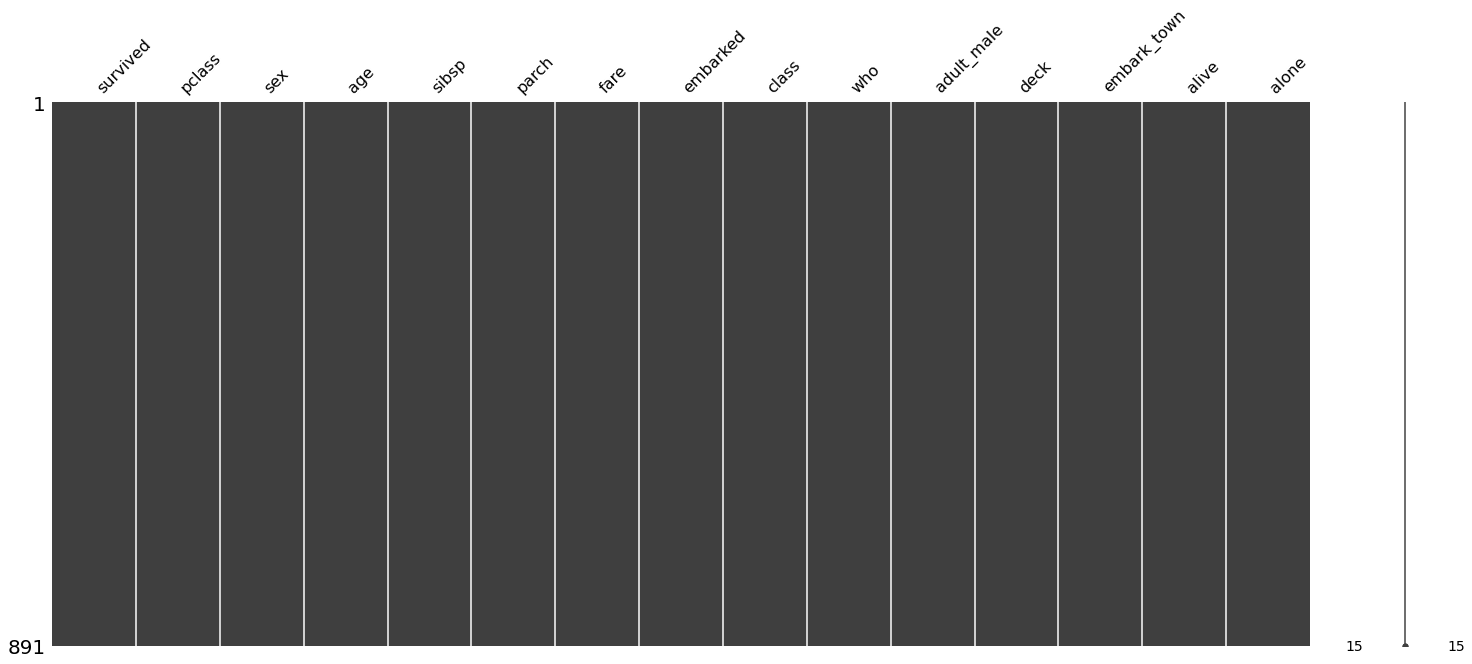

In [ ]:
msno.matrix(titanic)